In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from copy import deepcopy
from sklearn.linear_model import Perceptron

# Binary Classification

## Problem A

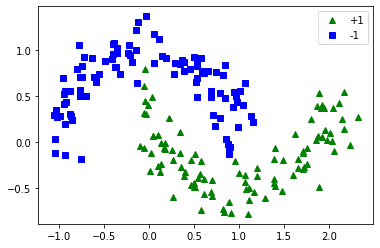

In [2]:
# load data
file = "halfmoon.csv"
df = pd.read_csv(file, header=0).iloc[:,1:].rename(columns={'X1': 0, 'X2': 1, 'Y': 2})
X = df.loc[:,0:1]
Y = df.loc[:,2]

# plot data points and their labels
plt.plot(X[0][Y == 1],X[1][Y == 1], 'g^', label='+1')
plt.plot(X[0][Y == 0],X[1][Y == 0], 'bs', label='-1')
plt.legend()

plt.show()

## Problem B

In [3]:
# create Perceptron model
clf = Perceptron(random_state=0)

# train model on dataset
clf.fit(X,Y)

# coefficient of determination of the prediction
print("E_in:\t\t", 1-clf.score(X,Y))
print("Weights:\t", clf.coef_)
print("Bias:\t\t", clf.intercept_)

E_in:		 0.125
Weights:	 [[ 0.8132967  -3.91517525]]
Bias:		 [1.]


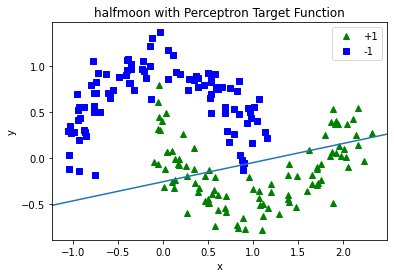

In [4]:
# plot dataset
plt.plot(X[0][Y == 1],X[1][Y == 1], 'g^', label='+1')
plt.plot(X[0][Y == 0],X[1][Y == 0], 'bs', label='-1')
plt.legend()

# get/set axis info
axes = plt.gca()
axes.set_title(file.rstrip('.csv') + ' with Perceptron Target Function')
axes.set_xlabel('x')
axes.set_ylabel('y')
xlim = axes.get_xlim()
ylim = axes.get_ylim()

# plot generated target function/decision boundary
target_function = np.append(clf.coef_[0], clf.intercept_[0])
slope = -target_function[0] / target_function[1]
intercept = target_function[2] / target_function[1]
Y_new = [slope * i + intercept for i in xlim]
plt.plot(xlim, Y_new)
axes.set_xlim(xlim)
axes.set_ylim(ylim)

plt.show()

## Problem C

In [5]:
training_set = df.sample(frac=0.8, random_state=1)
train_X, train_Y = training_set.loc[:,0:1], training_set.loc[:,2]
testing_set = df.copy().drop(training_set.index)
test_X, test_Y = testing_set.loc[:,0:1], testing_set.loc[:,2]

In [6]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# create Perceptron model
clf = Perceptron(max_iter=1)

# train model on dataset
clf.fit(train_X,train_Y,coef_init=np.zeros((1,2)), intercept_init=np.zeros((1,)))
best_model = deepcopy(clf)
min_ein = 1 - clf.score(X,Y)

for _ in range(10000):
    clf.fit(train_X,train_Y,coef_init=best_model.coef_, intercept_init=best_model.intercept_)
    new_ein = 1 - clf.score(train_X,train_Y)
    if new_ein < min_ein:
        best_model = deepcopy(clf)
        min_ein = new_ein
    
print("E_in:\t\t", 1-best_model.score(train_X,train_Y))
print("E_test:\t\t", 1-best_model.score(test_X,test_Y))
print("Weights:\t", best_model.coef_)
print("Bias:\t\t", best_model.intercept_)

E_in:		 0.4375
E_test:		 0.44999999999999996
Weights:	 [[ 0.91727535 -1.64827737]]
Bias:		 [2.]


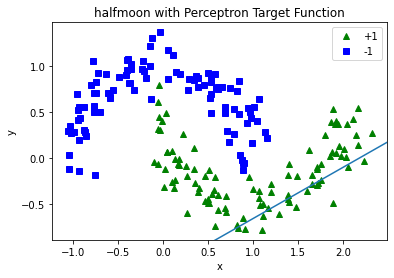

In [7]:
# plot dataset
plt.plot(X[0][Y == 1],X[1][Y == 1], 'g^', label='+1')
plt.plot(X[0][Y == 0],X[1][Y == 0], 'bs', label='-1')
plt.legend()

# get/set axis info
axes = plt.gca()
axes.set_title(file.rstrip('.csv') + ' with Perceptron Target Function')
axes.set_xlabel('x')
axes.set_ylabel('y')
xlim = axes.get_xlim()
ylim = axes.get_ylim()

# plot generated target function/decision boundary
target_function = np.append(best_model.coef_[0], best_model.intercept_[0])
slope = -target_function[0] / target_function[1]
intercept = target_function[2] / target_function[1]
Y_new = [slope * i + intercept for i in xlim]
plt.plot(xlim, Y_new)
axes.set_xlim(xlim)
axes.set_ylim(ylim)

plt.show()

In [8]:
# 95% Confidence > delta = 1 - 0.95 = 0.05
ci = 0.95
delta = 1 - ci
print("Error Probability w/ Hoeffding Inequality for 95% Confidence on ", len(testing_set)," samples:\t", np.sqrt(-np.log(delta/2)/(2*len(testing_set))))

Error Probability w/ Hoeffding Inequality for 95% Confidence on  40  samples:	 0.21473470417336876


# Linear Regression 1

## Problem A

In [9]:
df = pd.read_csv("auto-mpg.data.txt", header=None, delim_whitespace=True)
df = df.loc[:,[0,2,3,4,5]].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)
df.insert(1,1,1)

training_set = df.sample(frac=0.8, random_state=1).reset_index()
training_set.pop('index')
train_X, train_Y = training_set.loc[:,1:5].rename(columns={1: 0, 2: 1, 3: 2, 4: 3, 5: 4}), training_set.loc[:,0]
testing_set = df.copy().drop(training_set.index).reset_index()
testing_set.pop('index')
test_X, test_Y = testing_set.loc[:,1:5].rename(columns={1: 0, 2: 1, 3: 2, 4: 3, 5: 4}), testing_set.loc[:,0]

In [10]:
def analytical_linear_regression(x,y):
    xt = np.transpose(x)
    return np.linalg.inv(xt @ x) @ xt @ y

w = analytical_linear_regression(train_X,train_Y)
print(w)

0    44.206556
1    -0.006523
2    -0.034624
3    -0.005561
4     0.050176
dtype: float64


In [11]:
def sample_error(w, X, y):
    N = len(X)
    Xt = np.transpose(X)
    yt = np.transpose(y)
    wt = np.transpose(w)
    first = wt @ Xt @ X @ w
    second = 2*(wt @ Xt @ y)
    last = yt @ y
    return (first - second + last)/N

print("E_in:\t", sample_error(w,train_X,train_Y))
print("E_test:\t", sample_error(w,test_X,test_Y))

E_in:	 18.37312607698431
E_test:	 36.27903771855781


## Problem B

In [12]:
e_in = []
e_test = []
for i in range(50):
    print("Iteration ", i)
    training_set = df.sample(frac=0.8).reset_index()
    training_set.pop('index')
    train_X, train_Y = training_set.loc[:,1:5].rename(columns={1: 0, 2: 1, 3: 2, 4: 3, 5: 4}), training_set.loc[:,0]
    testing_set = df.copy().drop(training_set.index).reset_index()
    testing_set.pop('index')
    test_X, test_Y = testing_set.loc[:,1:5].rename(columns={1: 0, 2: 1, 3: 2, 4: 3, 5: 4}), testing_set.loc[:,0]
    
    w = analytical_linear_regression(train_X,train_Y)
    e_in.append(sample_error(w,train_X,train_Y))
    e_test.append(sample_error(w,test_X,test_Y))
    print("\tE_in:\t", e_in[i])
    print("\tE_test:\t", e_test[i])
print("---")
print("E_in Variance:\t\t", np.var(e_in))
print("E_test Variance:\t", np.var(e_test))

Iteration  0
	E_in:	 18.198585733311887
	E_test:	 38.11175959919765
Iteration  1
	E_in:	 17.82867560108822
	E_test:	 38.1730901955827
Iteration  2
	E_in:	 17.674602308530954
	E_test:	 36.5833928028369
Iteration  3
	E_in:	 18.330020171889057
	E_test:	 36.44613192603756
Iteration  4
	E_in:	 18.287675592646554
	E_test:	 38.46365476897281
Iteration  5
	E_in:	 19.51936781875203
	E_test:	 36.55950029520682
Iteration  6
	E_in:	 18.899124229826736
	E_test:	 38.22177979952412
Iteration  7
	E_in:	 17.94698905785458
	E_test:	 37.16899596819367
Iteration  8
	E_in:	 16.37605142859684
	E_test:	 40.95724533581597
Iteration  9
	E_in:	 18.046358894501026
	E_test:	 38.07801227325981
Iteration  10
	E_in:	 18.528764841015068
	E_test:	 38.39033111475128
Iteration  11
	E_in:	 16.62958218357742
	E_test:	 39.1052740381685
Iteration  12
	E_in:	 17.7413505155586
	E_test:	 38.38132774407423
Iteration  13
	E_in:	 17.36765718545262
	E_test:	 40.348203607323924
Iteration  14
	E_in:	 19.19664024200207
	E_test:	 34.8

## Problem C

In [13]:
def LMS(x_in, y_in, iterations=100, u=0.8, threshold=0.00001):
    w = np.zeros([len(x_in.iloc[0]),])
    Xt = np.transpose(x_in)
    N = len(x_in)
    
    for i in range(iterations):
        print(sample_error(w, x_in, y_in), Xt, x_in)
        grad = 2/N * (Xt @ x_in @ w - Xt @ y_in)
        w = w - u * grad
        
    return w

print(LMS(train_X, train_Y, iterations=10))

590.0151572327044       0       1       2       3       4       5       6       7       8    \
0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
1   400.0   140.0   105.0   225.0    90.0   120.0    98.0   232.0   120.0   
2   175.0    88.0    74.0   110.0    48.0    88.0    66.0   100.0    88.0   
3  5140.0  2890.0  1980.0  3360.0  2335.0  2160.0  1800.0  2901.0  2957.0   
4    12.0    17.3    15.3    16.6    23.7    14.5    14.4    16.0    17.0   

      9    ...     308     309     310     311     312     313     314  \
0     1.0  ...     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
1   232.0  ...    80.0    96.0   400.0    97.0    90.0   304.0   156.0   
2    90.0  ...   110.0    69.0   167.0    52.0    70.0   150.0   122.0   
3  3210.0  ...  2720.0  2189.0  4906.0  2130.0  1937.0  3892.0  2807.0   
4    17.2  ...    13.5    18.0    12.5    24.6    14.0    12.5    13.5   

      315     316     317  
0     1.0     1.0     1.0  
1   351.0   225.0 

[318 rows x 5 columns]
5.589529852961803e+117       0       1       2       3       4       5       6       7       8    \
0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
1   400.0   140.0   105.0   225.0    90.0   120.0    98.0   232.0   120.0   
2   175.0    88.0    74.0   110.0    48.0    88.0    66.0   100.0    88.0   
3  5140.0  2890.0  1980.0  3360.0  2335.0  2160.0  1800.0  2901.0  2957.0   
4    12.0    17.3    15.3    16.6    23.7    14.5    14.4    16.0    17.0   

      9    ...     308     309     310     311     312     313     314  \
0     1.0  ...     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
1   232.0  ...    80.0    96.0   400.0    97.0    90.0   304.0   156.0   
2    90.0  ...   110.0    69.0   167.0    52.0    70.0   150.0   122.0   
3  3210.0  ...  2720.0  2189.0  4906.0  2130.0  1937.0  3892.0  2807.0   
4    17.2  ...    13.5    18.0    12.5    24.6    14.0    12.5    13.5   

      315     316     317  
0     1.0     1.0 

# Linear Regression 2

## Problem B

In [14]:
file = "bottle.csv"
df = pd.read_csv(file, header=0)
df.insert(0,'bias', 1)
X = df.loc[:,'Salnty']
Y = df.loc[:,'T_degC']

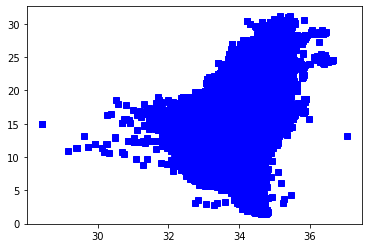

In [15]:
plt.plot(X,Y,'bs')
plt.show()

## Problem C

In [16]:
training_set = df.sample(frac=0.8, random_state=1).reset_index()
training_set.pop('index')
train_X, train_Y = training_set.loc[:,['bias','Salnty']], training_set.loc[:,'T_degC']
testing_set = df.copy().drop(training_set.index).reset_index()
testing_set.pop('index')
test_X, test_Y = testing_set.loc[:,['bias','Salnty']], testing_set.loc[:,'T_degC']

w = analytical_linear_regression(train_X,train_Y)
train_X,trainY = train_X.to_numpy(),train_Y.to_numpy()
test_X,test_Y = test_X.to_numpy(),test_Y.to_numpy()
e_in.append(sample_error(w,train_X,train_Y))
e_test.append(sample_error(w,test_X,test_Y))
print("E_in:\t", e_in[i])
print("E_test:\t", e_test[i])

E_in:	 16.57257189920905
E_test:	 42.42175569841693


# Logistic Regression

In [17]:
def redefine_class(string):
    if string == 'Iris-setosa':
        return 1
    elif string == 'Iris-versicolour':
        return 0
    else:
        return -1

In [18]:
df = pd.read_csv("iris.data.txt", header=None, sep=",")
df[4] = df[4].apply(lambda x: redefine_class(x))
df.insert(0, 'bias', 1)
df = df.rename(columns={'bias': 0, 0: 1, 1: 2, 2: 3, 3: 4, 4: 5})

training_set = df.sample(frac=0.8, random_state=1).reset_index()
training_set.pop('index')
train_X, train_Y = training_set.loc[:,0:4], training_set.loc[:,5]
testing_set = df.copy().drop(training_set.index).reset_index()
testing_set.pop('index')
test_X, test_Y = testing_set.loc[:,0:4], testing_set.loc[:,5]

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(train_X,train_Y)
print("E_in:\t", 1-clf.score(train_X,train_Y))

E_in:	 0.0


In [20]:
print("E_in:\t", 1-clf.score(test_X,test_Y))

E_in:	 0.0


In [21]:
print(clf.coef_, clf.intercept_)

[[-6.25344916e-06 -4.47882249e-01  8.11311597e-01 -2.17707962e+00
  -9.21972445e-01]] [6.66365508]


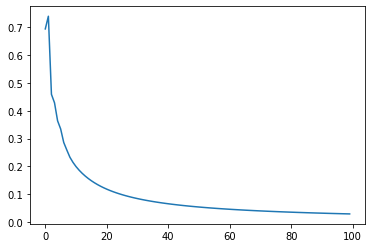

In [25]:
def logistic_regression(x, y, iterations=100, mew=0.2):
    w = np.zeros([5,])
    N = len(x)
    e_in = []
    for i in range(iterations):
        wt = np.transpose(w)
        res = []
        e_in_tmp = 0
        for i in range(N):
            res.append(y[i]*x.iloc[i]/(1+np.exp(y[i]*wt @ x.iloc[i])))
            e_in_tmp += np.log(1+np.exp(-y[i]*wt @ x.iloc[i]))
        w += mew*pd.DataFrame(res).sum(axis=0)/N
        e_in.append(e_in_tmp/N)
    return w, e_in

w, e_in = logistic_regression(train_X, train_Y, iterations=100)
plt.plot(e_in)
plt.show()

In [23]:
def calc_logistic_error(x, y, w):
    e = 0
    wt = np.transpose(w)
    for i in range(len(x)):
        e += np.log(1+np.exp(-y[i]*wt @ x.iloc[i]))
    return e/len(x)

In [24]:
print("Bias:\t\t", w[0])
print("Weights:\t", w[1:].to_numpy())
print("E_in:\t\t", e_in[-1])
print("E_in:\t\t", calc_logistic_error(train_X, train_Y, w))
print("E_test:\t\t", calc_logistic_error(test_X, test_Y, w))

Bias:		 0.38237093285709717
Weights:	 [ 0.6147577   2.07113679 -3.22594905 -1.47708714]
E_in:		 0.0038679017782627416
E_in:		 0.0038644973640325356
E_test:		 8.611023698691849e-05
